***Assignment - to apply KNN algo on BoW, TfIDF, W2V, TfIdf-W2V vectorizers***

In [1]:
#importing general purpose libraries:
import psutil
import os
import sys
import datetime
import time
import warnings
import pickle
warnings.filterwarnings('ignore')
#importing EDA libraries and maths libraries
warnings.filterwarnings('ignore', 'Data with input dtype int64 was converted to float64 by StandardScaler.')
import pandas as pd
import numpy as np
import scipy as sc
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#from mlxtend.plotting import plot_decision_regions #for decision surface:

***importing performance metric libraries***

In [2]:
#importing KNN relevant libraries:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#importing performance libraries:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

#train test split libaries:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
#checking current memory utilization:
psutil.virtual_memory()

svmem(total=25285955584, available=21555621888, percent=14.8, used=3381485568, free=20653178880, active=4049473536, inactive=346533888, buffers=53899264, cached=1197391872, shared=11333632, slab=68972544)

In [4]:
#importing the preprocessed file in database.
import sqlite3
con = sqlite3.connect('/home/jalesh_j/Data_Preprocessing/cleaned.sqlite')
df = pd.read_sql_query("""select * from cleandf""", con)

In [5]:
df.columns

Index(['index', 'Score', 'Time', 'Text', 'Summary', 'cleanedtext',
       'numeric_score', 'bow_feat', 'bow_new_feat', 'tfw2v_feat'],
      dtype='object')

***unfeatured engineering preprocessed text***

In [6]:
#tfidf, w2v, tfidf-w2v cleaned text
print(df['Text'].head(3))

print('\n' * 2)

#bow cleaned text
print(df['cleanedtext'].head(2))

0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
Name: Text, dtype: object



0    bought sever vital can dog food product found ...
1    product arriv label jumbo salt peanut peanut a...
Name: cleanedtext, dtype: object


In [7]:
len(df)

364171

***sorting the datframe based on time:***

In [8]:
#sorting the datframe based on time:
df = df.sort_values('Time', ascending=True)
df['Time'].head(8)

117924    939340800
117901    940809600
298792    944092800
169281    944438400
298791    946857600
169342    947376000
169267    948240000
63317     948672000
Name: Time, dtype: int64

***taking 50000 samples***

In [9]:
d = df.head(50000)
x = d['cleanedtext']
y = d['numeric_score'].apply(lambda x: 0 if int(x) < 3 else 1)
y.value_counts()

1    44377
0     5623
Name: numeric_score, dtype: int64

# 1.BoW-BruteForce implementation

In [9]:
#train test split:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

xt, xtest, yt, ytest = train_test_split(x, y, test_size=0.2, shuffle=False)
xtr, xcv, ytr, ycv = train_test_split(xt, yt, test_size=0.2, shuffle=False)

In [10]:
print(ytr.value_counts())

1    28510
0     3490
Name: numeric_score, dtype: int64


***balancing the dataset***

In [11]:
%%time

dtrain = pd.concat([xtr, ytr], axis=1)
print(dtrain.head(2))
d0 = dtrain[dtrain['numeric_score'] == 0.0]
d1 = dtrain[dtrain['numeric_score'] == 1.0]
print()
print(dtrain.head(2))
print()
print(d0.head(4))

d1_count, d0_count = ytr.value_counts()
print(d1_count)
print(d0_count)

#oversampling of minority class:
d0_over = d0.sample(d1_count, replace=True)
print(len(d0_over))

#concatenation:
dtrain = pd.concat([d1, d0_over], axis=0)
print(len(dtrain))

                                              cleanedtext  numeric_score
117924  witti littl book make son laugh loud recit car...              1
117901  rememb see show air televis year ago child sis...              1

                                              cleanedtext  numeric_score
117924  witti littl book make son laugh loud recit car...              1
117901  rememb see show air televis year ago child sis...              1

                                              cleanedtext  numeric_score
169267  alway enjoy movi funni entertain didn hesit pi...              0
298797  michael keaton bring distinguish characterist ...              0
169263  continu amaz shoddi treatment movi get dvd rel...              0
169266  let know movi one person favorit ghost movi sa...              0
28510
3490
28510
57020
CPU times: user 40 ms, sys: 0 ns, total: 40 ms
Wall time: 84.3 ms


In [12]:
dtrain.numeric_score.value_counts()

1    28510
0    28510
Name: numeric_score, dtype: int64

***Instantiating Bow object***

In [13]:
%time
#importing Bow library:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(ngram_range=(1, 1))
xtr = bow.fit_transform(dtrain['cleanedtext'])
xcv = bow.transform(xcv)
xtest = bow.transform(xtest)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.2 µs


***Standardizing data***

In [14]:
#standardizing the data:
sc = StandardScaler(with_mean=False)
xtr = sc.fit_transform(xtr)
xcv = sc.transform(xcv)
xtest = sc.transform(xtest)
print(xtr.shape)
print(xcv.shape)
print(xtest.shape)

(57020, 23081)
(8000, 23081)
(10000, 23081)


/home/jalesh_j/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jalesh_j/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jalesh_j/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jalesh_j/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


***KNN on BoW***

In [16]:
#checking memory usage:
psutil.virtual_memory()

svmem(total=25286242304, available=23465373696, percent=7.2, used=1467346944, free=22748409856, active=1385566208, inactive=940220416, buffers=41017344, cached=1029468160, shared=19644416, slab=57643008)

In [17]:
%%time

pre_rec_tr_dict = {}
pre_rec_cv_dict = {}
auc_cv_dict = {}
auc_tr_dict = {}


for i in range(3, 50, 4):
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='brute', weights='uniform', n_jobs=-1)
    knn.fit(xtr, dtrain['numeric_score'])
    #performance metrics for cv data:
    y_pred_cv = knn.predict_proba(xcv)        
    fpr_cv, tpr_cv, thresholds_cv = roc_curve(ycv, y_pred_cv[:,1])
    auc_cv_dict[i] = auc(fpr_cv, tpr_cv)
    #pre_cv, rec_cv, threshold_cv = precision_recall_curve(ycv, y_pred_cv[:,1])
    #pre_rec_cv_dict[i] = [pre_cv, rec_cv]
    
    #performance metrics for training data:
    y_pred_tr = knn.predict_proba(xtr)
    fpr_tr, tpr_tr, thresholds_tr = roc_curve(dtrain['numeric_score'], y_pred_tr[:,1])
    auc_tr_dict[i] = auc(fpr_tr, tpr_tr)
    #pre_tr, rec_tr, threshold_tr = precision_recall_curve(ytr, y_pred_tr[:,1])
    #pre_rec_tr_dict[i] = [pre_tr, rec_tr]  

CPU times: user 15min 4s, sys: 20min 20s, total: 35min 25s
Wall time: 43min 14s


In [18]:
psutil.virtual_memory()

svmem(total=25286242304, available=11378216960, percent=55.0, used=13553856512, free=10659201024, active=13438607360, inactive=934817792, buffers=41926656, cached=1031258112, shared=19709952, slab=60669952)

***Sorting dictionaries on values(AUC score) on training and cv auc score***

In [19]:
# print('AUC of cross validation dictionary is :\n{}'.format(auc_cv_dict))
# print('*' * 70)
# print('AUC score of training dataset is :\n{}'.format(auc_tr_dict))
# print('*' * 70)

#sorting dictionary wrt higest AuC Score of both training and cv data:

cv_tup = sorted(auc_cv_dict.items(), key= lambda x: x[1],reverse=True)
tr_tup = sorted(auc_tr_dict.items(), key= lambda x: x[1],reverse=True)
print(cv_tup)
print('*' * 70)
print(tr_tup)


[(47, 0.7250877621644958), (43, 0.7204434997338767), (39, 0.7165185475660079), (35, 0.7147030281699575), (31, 0.7093259068243791), (27, 0.6984376402497201), (23, 0.6914156663373421), (19, 0.6760919867266317), (15, 0.6584377849739597), (11, 0.6405028335928362), (7, 0.6199026467753976), (3, 0.5748837086848861)]
**********************************************************************
[(3, 0.999909016767671), (7, 0.9920147256447029), (11, 0.9603024020936489), (15, 0.9312283677532088), (19, 0.9131611373783693), (23, 0.902304316170331), (27, 0.8956959301326334), (31, 0.8910559932019397), (35, 0.8888873017534876), (39, 0.8854622886417303), (43, 0.8829095497269324), (47, 0.8797871078729476)]


***Plotting AUC Curve on training and cv data***

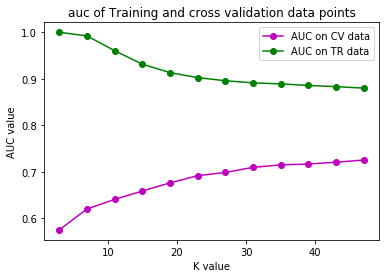

In [20]:
plt.plot([x[0] for x in cv_tup], [x[1] for x in cv_tup], linestyle='-', color='m', marker='o',label='AUC on CV data')
plt.plot([x[0] for x in tr_tup], [x[1] for x in tr_tup], linestyle='-', color='g', marker='o', label='AUC on TR data')
#plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("K value")
plt.ylabel('AUC value')
plt.title('auc of Training and cross validation data points')
plt.legend()

***KNN brute force algo on optimal K***

In [23]:
knn = KNeighborsClassifier(n_neighbors=47, algorithm='brute', weights='uniform', n_jobs=-1)
knn.fit(xtr, dtrain['numeric_score'])
#performance metrics for cv data:
y_pred_test = knn.predict_proba(xtest)
y_pred = knn.predict(xtest)
fpr_test, tpr_test, thresholds_test= roc_curve(ytest, y_pred_test[:,1])
auc_test = auc(fpr_test, tpr_test)
print(auc_test)

y_pred_tr = knn.predict_proba(xtr)
fpr_tr, tpr_tr, thresholds_tr = roc_curve(dtrain['numeric_score'], y_pred_tr[:,1])

0.7304104708171557


***Plotting confusion matrix***

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.2 µs


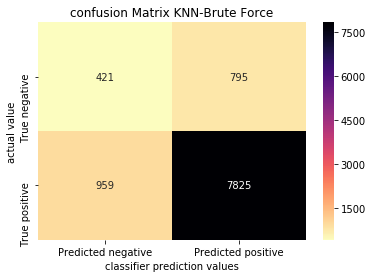

In [24]:
%time
#creating confusion matrix:

cf = confusion_matrix(ytest, y_pred)
labels = ['True negative', 'True positive']

df_cf = pd.DataFrame(cf, index=labels, columns=['Predicted negative', 'Predicted positive'])
sns.heatmap(df_cf, annot=True,fmt='3d', cmap='magma_r')

plt.title("confusion Matrix KNN-Brute Force")
plt.xlabel("classifier prediction values")
plt.ylabel("actual value")
plt.show()

***Plotting ROC of test and Training data***

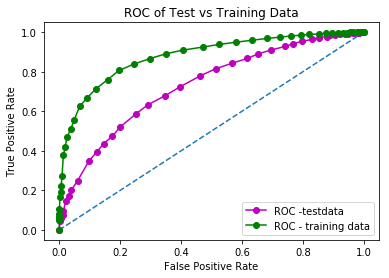

In [25]:
plt.plot(fpr_test, tpr_test, color='m', marker='o',label='ROC -testdata')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr, tpr_tr, linestyle='-', color='g', marker='o', label='ROC - training data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Test vs Training Data')
plt.legend()

***BowBruteForce - optimal k =  47 , AUC = 0.73***

In [26]:
#checking memory usage:
psutil.virtual_memory()

svmem(total=25286242304, available=16968077312, percent=32.9, used=7972675584, free=16923115520, active=7925469184, inactive=216117248, buffers=21594112, cached=368857088, shared=19709952, slab=42926080)

# 2. BOW - KDtree implementation

In [10]:
#train test split:
xt, xtest, yt, ytest = train_test_split(x, y, test_size=0.2, shuffle=False)
xtr, xcv, ytr, ycv = train_test_split(xt, yt, test_size=0.2, shuffle=False)

#balancing the training dataset:
dtrain = pd.concat([xtr, ytr], axis=1)
print(dtrain.head(2))
d0 = dtrain[dtrain['numeric_score'] == 0.0]
d1 = dtrain[dtrain['numeric_score'] == 1.0]

d1_count, d0_count = ytr.value_counts()
print(d1_count)
print(d0_count)

#oversampling of minority class:
d0_over = d0.sample(d1_count, replace=True)
print(len(d0_over))

#concatenation:
dtrain = pd.concat([d1, d0_over], axis=0)
print(len(dtrain))


                                              cleanedtext  numeric_score
117924  witti littl book make son laugh loud recit car...              1
117901  rememb see show air televis year ago child sis...              1
28510
3490
28510
57020


***instantiating BoW featurizer***

In [12]:
#instantiating BoW featurizer:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(ngram_range=(1, 1),min_df=10)
xtr = bow.fit_transform(dtrain['cleanedtext'])
xcv = bow.transform(xcv)
xtest = bow.transform(xtest)

print(xtr.shape)
print(xcv.shape)
print(xtest.shape)

(57020, 7235)
(8000, 7235)
(10000, 7235)


***converting into dense matrix and reducing the dimesnion***

In [13]:
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components=500)

xtr = tsvd.fit_transform(xtr)
xcv = tsvd.transform(xcv)
xtest = tsvd.transform(xtest)

print(xtr.shape)
print(xcv.shape)
print(xtest.shape)
 

(57020, 500)
(8000, 500)
(10000, 500)


***Standardizing data***

In [15]:
sc = StandardScaler(with_mean=False)

xtr = sc.fit_transform(xtr)
xcv = sc.transform(xcv)
xtest = sc.transform(xtest)

***Bow-KNN-KDtree***

In [16]:
%%time

auc_cv_dict = {}
auc_tr_dict = {}


for i in range(3, 50, 4):
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='kd_tree', weights='uniform', n_jobs=-1)
    knn.fit(xtr, dtrain['numeric_score'])
    #performance metrics for cv data:
    y_pred_cv = knn.predict_proba(xcv)        
    fpr_cv, tpr_cv, thresholds_cv = roc_curve(ycv, y_pred_cv[:,1])
    auc_cv_dict[i] = auc(fpr_cv, tpr_cv)
    
    
    #performance metrics for training data:
    y_pred_tr = knn.predict_proba(xtr)
    fpr_tr, tpr_tr, thresholds_tr = roc_curve(dtrain['numeric_score'], y_pred_tr[:,1])
    auc_tr_dict[i] = auc(fpr_tr, tpr_tr)
   

CPU times: user 17h 37min 57s, sys: 2.57 s, total: 17h 38min
Wall time: 1h 55min 33s


***optimal k for kd tree***

In [22]:
# print('AUC of cross validation dictionary is :\n{}'.format(auc_cv_dict))
# print('*' * 70)
# print('AUC score of training dataset is :\n{}'.format(auc_tr_dict))
# print('*' * 70)

#sorting dictionary wrt higest AuC Score of both training and cv data:

cv_tup = sorted(auc_cv_dict.items(), key= lambda x: x[1],reverse=True)
tr_tup = sorted(auc_tr_dict.items(), key= lambda x: x[1],reverse=True)
print(cv_tup)
print('*' * 70)
print(tr_tup)
print()
print('optimal k for kdtree on CV data is {}'.format(cv_tup[0]))

[(39, 0.7169594176296602), (35, 0.7167301682758), (43, 0.7150396659887721), (31, 0.7147048757134404), (47, 0.7137068173276794), (27, 0.7103204240851311), (23, 0.7046516218121599), (19, 0.698454960969874), (15, 0.6893363331281019), (11, 0.6767122994510794), (7, 0.6624843670877988), (3, 0.6154138859212721)]
**********************************************************************
[(3, 0.9999365855987076), (7, 0.9905740753704295), (11, 0.9502152432008018), (15, 0.9185605154203248), (19, 0.9006802396987967), (23, 0.886191554564165), (27, 0.8749777909035468), (31, 0.865403103343532), (35, 0.8576313270304217), (39, 0.8487867038475058), (43, 0.8396443973272807), (47, 0.8309787405601805)]

optimal k for kdtree on CV data is (39, 0.7169594176296602)


***Plotting training vs CV AUC plot***

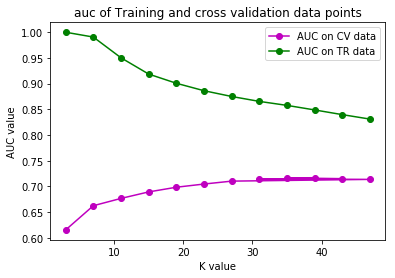

In [23]:
plt.plot([x[0] for x in cv_tup], [x[1] for x in cv_tup], linestyle='-', color='m', marker='o',label='AUC on CV data')
plt.plot([x[0] for x in tr_tup], [x[1] for x in tr_tup], linestyle='-', color='g', marker='o', label='AUC on TR data')
#plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("K value")
plt.ylabel('AUC value')
plt.title('auc of Training and cross validation data points')
plt.legend()

***Bow-Kdtree on optimal K=39***

In [25]:
knn = KNeighborsClassifier(n_neighbors=39, algorithm='kd_tree', weights='uniform', n_jobs=-1)
knn.fit(xtr, dtrain['numeric_score'])

#performance metrics for cv data:
y_pred_test = knn.predict_proba(xtest)
y_pred = knn.predict(xtest)
fpr_test, tpr_test, thresholds_test= roc_curve(ytest, y_pred_test[:,1])
auc_test = auc(fpr_test, tpr_test)
print(auc_test)

y_pred_tr = knn.predict_proba(xtr)
fpr_tr, tpr_tr, thresholds_tr = roc_curve(dtrain['numeric_score'], y_pred_tr[:,1])

0.7091511611272889


In [26]:
psutil.virtual_memory()

svmem(total=25286234112, available=22880768000, percent=9.5, used=2040279040, free=21856940032, active=2056912896, inactive=1131753472, buffers=54362112, cached=1334652928, shared=19656704, slab=81936384)

***Plotting confusion matrix***

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.72 µs


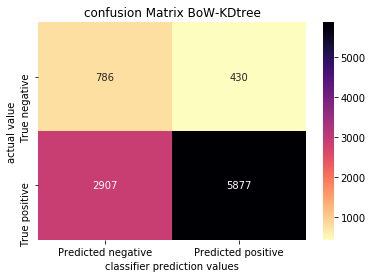

In [27]:
%time
#creating confusion matrix:

cf = confusion_matrix(ytest, y_pred)
labels = ['True negative', 'True positive']

df_cf = pd.DataFrame(cf, index=labels, columns=['Predicted negative', 'Predicted positive'])
sns.heatmap(df_cf, annot=True,fmt='3d', cmap='magma_r')

plt.title("confusion Matrix BoW-KDtree")
plt.xlabel("classifier prediction values")
plt.ylabel("actual value")
plt.show()

***BowKDtree - optimal k =  39 , AUC = 0.70***

# 3. Bow-TFIDF-BruteForce implementation
1. taking preprecossed 'text' column for tfidf:
2. train-test-cv split  


In [10]:
#sampling precossed 'text' column for tfidf:
d = df.head(50000)
x = d['Text']
y = d['numeric_score'].apply(lambda x: 0 if int(x) < 3 else 1)

#train-test split and balancing the dataset:

#train test split:
xt, xtest, yt, ytest = train_test_split(x, y, test_size=0.2, shuffle=False)
xtr, xcv, ytr, ycv = train_test_split(xt, yt, test_size=0.2, shuffle=False)

***Balancing the training dataset***

In [11]:
#balancing the training dataset:
dtrain = pd.concat([xtr, ytr], axis=1)
print(dtrain.head(2))
d0 = dtrain[dtrain['numeric_score'] == 0.0]
d1 = dtrain[dtrain['numeric_score'] == 1.0]

d1_count, d0_count = ytr.value_counts()
print(d1_count)
print(d0_count)

#oversampling of minority class:
d0_over = d0.sample(d1_count, replace=True)
print(len(d0_over))

#concatenation:
dtrain = pd.concat([d1, d0_over], axis=0)
print(len(dtrain))

                                                     Text  numeric_score
117924  this witty little book makes my son laugh at l...              1
117901  i can remember seeing the show when it aired o...              1
28510
3490
28510
57020


***instantiating TF-idf featurizer***

In [12]:
%time
#importing Bow library:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 1))
xtr = tfidf.fit_transform(dtrain['Text'])
xcv = tfidf.transform(xcv)
xtest = tfidf.transform(xtest)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.48 µs


***tfidf_features storing in a list and saving it to disc***

In [13]:
tfidf_features = tfidf.get_feature_names()
file = open('tfidf_features.pickle', 'wb')
pickle.dump(tfidf_features, file)
file.close()
tfidf_features.clear()

***standardizing the data***

In [14]:
#standardizing the data:
sc = StandardScaler(with_mean=False)
xtr = sc.fit_transform(xtr)
xcv = sc.transform(xcv)
xtest = sc.transform(xtest)
print(xtr.shape)
print(xcv.shape)
print(xtest.shape)

(57020, 33510)
(8000, 33510)
(10000, 33510)


In [15]:
psutil.virtual_memory()

svmem(total=25285955584, available=23428489216, percent=7.3, used=1503899648, free=22710829056, active=1405628416, inactive=940216320, buffers=41181184, cached=1030045696, shared=19697664, slab=58449920)

***TFIDF - BruteForce algo implementation***

In [16]:
%%time

auc_cv_dict = {}
auc_tr_dict = {}


for i in range(3, 50, 4):
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='brute', weights='uniform', n_jobs=-1)
    knn.fit(xtr, dtrain['numeric_score'])
    
    #performance metrics for cv data:
    y_pred_cv = knn.predict_proba(xcv)        
    fpr_cv, tpr_cv, thresholds_cv = roc_curve(ycv, y_pred_cv[:,1])
    auc_cv_dict[i] = auc(fpr_cv, tpr_cv)
    
    
    #performance metrics for training data:
    y_pred_tr = knn.predict_proba(xtr)
    fpr_tr, tpr_tr, thresholds_tr = roc_curve(dtrain['numeric_score'], y_pred_tr[:,1])
    auc_tr_dict[i] = auc(fpr_tr, tpr_tr)    

CPU times: user 15min 28s, sys: 20min 56s, total: 36min 24s
Wall time: 44min 58s


In [17]:
psutil.virtual_memory()

svmem(total=25285955584, available=8541278208, percent=66.2, used=16390275072, free=7821647872, active=16258981888, inactive=935141376, buffers=42041344, cached=1031991296, shared=19771392, slab=62816256)

***optimal K on CV data***

In [18]:
#sorting dictionary wrt higest AuC Score of both training and cv data:
cv_tup = sorted(auc_cv_dict.items(), key= lambda x: x[1],reverse=True)
tr_tup = sorted(auc_tr_dict.items(), key= lambda x: x[1],reverse=True)
print(cv_tup)
print()
print('optimal k and auc value on cv data is:\n {}'.format(cv_tup[0]))

[(11, 0.6682594800920261), (7, 0.6655519051175569), (15, 0.6359692698092457), (3, 0.6109179658361497), (19, 0.5896835327371618), (47, 0.5823828107017723), (43, 0.5822009816306449), (39, 0.5803842305389392), (35, 0.5701045755800017), (23, 0.5687226900356284), (31, 0.5641347776812435), (27, 0.5640384744771876)]

optimal k and auc value on cv data is:
 (11, 0.6682594800920261)


***training vs CV AUC plot for various k***

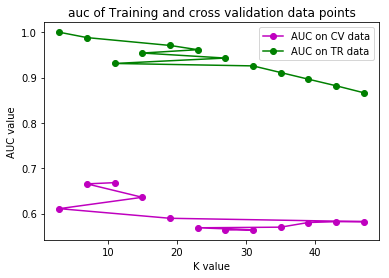

In [19]:
plt.plot([x[0] for x in cv_tup], [x[1] for x in cv_tup], linestyle='-', color='m', marker='o',label='AUC on CV data')
plt.plot([x[0] for x in tr_tup], [x[1] for x in tr_tup], linestyle='-', color='g', marker='o', label='AUC on TR data')
#plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("K value")
plt.ylabel('AUC value')
plt.title('auc of Training and cross validation data points')
plt.legend()

***TFidf brute force classifier built on optimal K***

In [20]:
knn = KNeighborsClassifier(n_neighbors=11, algorithm='brute', weights='uniform', n_jobs=-1)
knn.fit(xtr, dtrain['numeric_score'])

#performance metrics for cv data:
y_pred_test = knn.predict_proba(xtest)
y_pred = knn.predict(xtest)
fpr_test, tpr_test, thresholds_test= roc_curve(ytest, y_pred_test[:,1])
auc_test = auc(fpr_test, tpr_test)
print(np.round(auc_test,2))

y_pred_tr = knn.predict_proba(xtr)
fpr_tr, tpr_tr, thresholds_tr = roc_curve(dtrain['numeric_score'], y_pred_tr[:,1])

0.67


***ROC plot on test vs training data***

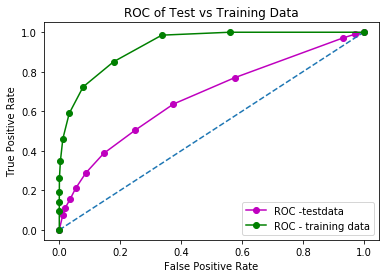

In [21]:
plt.plot(fpr_test, tpr_test, color='m', marker='o',label='ROC -testdata')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr, tpr_tr, linestyle='-', color='g', marker='o', label='ROC - training data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Test vs Training Data')
plt.legend()

***plotting confusion matrix***

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.68 µs


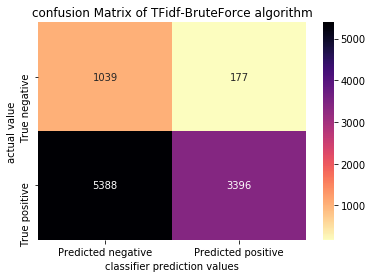

In [22]:
%time
#creating confusion matrix:

cf = confusion_matrix(ytest, y_pred)
labels = ['True negative', 'True positive']

df_cf = pd.DataFrame(cf, index=labels, columns=['Predicted negative', 'Predicted positive'])
sns.heatmap(df_cf, annot=True,fmt='3d', cmap='magma_r')

plt.title("confusion Matrix of TFidf-BruteForce algorithm")
plt.xlabel("classifier prediction values")
plt.ylabel("actual value")
plt.show()

***TFidfBruteForce - optimal k =  11 , AUC = 0.67***

# 4. TF-idf-KDtree implementation

***taking sorted 10K point only as KD tree is taking soo much of time***

In [7]:
#sampling precossed 'text' column for tfidf:
d = df.head(50000)
x = d['Text']
y = d['numeric_score'].apply(lambda x: 0 if int(x) < 3 else 1)

#train-test split and balancing the dataset:

#train test split:
xt, xtest, yt, ytest = train_test_split(x, y, test_size=0.2, shuffle=False)
xtr, xcv, ytr, ycv = train_test_split(xt, yt, test_size=0.2, shuffle=False)

In [8]:
psutil.virtual_memory()

svmem(total=25285955584, available=23553781760, percent=6.9, used=1378410496, free=22803169280, active=1310449664, inactive=940683264, buffers=41291776, cached=1063084032, shared=19697664, slab=58957824)

***Balancing training data***

In [9]:
#balancing the training dataset:
dtrain = pd.concat([xtr, ytr], axis=1)
print(dtrain.head(2))
d0 = dtrain[dtrain['numeric_score'] == 0.0]
d1 = dtrain[dtrain['numeric_score'] == 1.0]

d1_count, d0_count = ytr.value_counts()
print(d1_count)
print(d0_count)

#oversampling of minority class:
d0_over = d0.sample(d1_count, replace=True)
print(len(d0_over))

#concatenation:
dtrain = pd.concat([d1, d0_over], axis=0)
print(len(dtrain))

                                                     Text  numeric_score
117924  this witty little book makes my son laugh at l...              1
117901  i can remember seeing the show when it aired o...              1
28510
3490
28510
57020


***initializing tfidf vectorizer***

In [10]:
%time
#importing TFIDF library:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=10, ngram_range=(1, 1))
xtr = tfidf.fit_transform(dtrain['Text'])
xcv = tfidf.transform(xcv)
xtest = tfidf.transform(xtest)

print(xtr.shape)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.2 µs
(57020, 10611)


***sparse to dense matrix conversion with reduced features***

In [11]:
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components=500)

xtr = tsvd.fit_transform(xtr)
xcv = tsvd.transform(xcv)
xtest = tsvd.transform(xtest)

print(xtr.shape)
print(xcv.shape)
print(xtest.shape)
 

(57020, 500)
(8000, 500)
(10000, 500)


***Standardizing data***

In [12]:
#standardizing the data:
sc = StandardScaler(with_mean=False)
xtr = sc.fit_transform(xtr)
xcv = sc.transform(xcv)
xtest = sc.transform(xtest)
print(xtr.shape)
print(xcv.shape)
print(xtest.shape)

(57020, 500)
(8000, 500)
(10000, 500)


***KNN-KDtree implementation of tfidf***

In [13]:
psutil.virtual_memory()

svmem(total=25285955584, available=23042207744, percent=8.9, used=1889882112, free=22285123584, active=1822142464, inactive=946888704, buffers=41414656, cached=1069535232, shared=19697664, slab=59330560)

In [14]:
%%time

auc_cv_dict = {}
auc_tr_dict = {}


for i in range(3, 50, 4):
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='kd_tree', weights='uniform', n_jobs=-1)
    knn.fit(xtr, dtrain['numeric_score'])
    
    #performance metrics for cv data:
    y_pred_cv = knn.predict_proba(xcv)        
    fpr_cv, tpr_cv, thresholds_cv = roc_curve(ycv, y_pred_cv[:,1])
    auc_cv_dict[i] = auc(fpr_cv, tpr_cv)
    
    
    #performance metrics for training data:
    y_pred_tr = knn.predict_proba(xtr)
    fpr_tr, tpr_tr, thresholds_tr = roc_curve(dtrain['numeric_score'], y_pred_tr[:,1])
    auc_tr_dict[i] = auc(fpr_tr, tpr_tr)    

CPU times: user 20h 36min 39s, sys: 2.69 s, total: 20h 36min 41s
Wall time: 1h 51min 28s


In [15]:
#sorting dictionary wrt higest AuC Score of both training and cv data:
cv_tup = sorted(auc_cv_dict.items(), key= lambda x: x[1],reverse=True)
tr_tup = sorted(auc_tr_dict.items(), key= lambda x: x[1],reverse=True)
print(cv_tup)
print()
print('optimal k and auc value on cv data is:\n {}'.format(cv_tup[0]))

[(47, 0.6003175311399604), (43, 0.5991817537837305), (39, 0.5950563431479462), (35, 0.5906984499572062), (15, 0.5873221412228365), (31, 0.5841702320406841), (19, 0.5826308434143773), (23, 0.5777631821842615), (27, 0.5750250457613426), (11, 0.5682009129636122), (7, 0.5510578649079285), (3, 0.5250836359840502)]

optimal k and auc value on cv data is:
 (47, 0.6003175311399604)


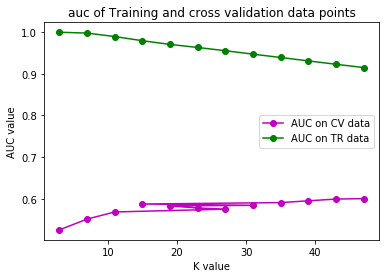

In [16]:
plt.plot([x[0] for x in cv_tup], [x[1] for x in cv_tup], linestyle='-', color='m', marker='o',label='AUC on CV data')
plt.plot([x[0] for x in tr_tup], [x[1] for x in tr_tup], linestyle='-', color='g', marker='o', label='AUC on TR data')
#plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("K value")
plt.ylabel('AUC value')
plt.title('auc of Training and cross validation data points')
plt.legend()

In [17]:
knn = KNeighborsClassifier(n_neighbors=11, algorithm='brute', weights='uniform', n_jobs=-1)
knn.fit(xtr, dtrain['numeric_score'])

#performance metrics for cv data:
y_pred_test = knn.predict_proba(xtest)
y_pred = knn.predict(xtest)
fpr_test, tpr_test, thresholds_test= roc_curve(ytest, y_pred_test[:,1])
auc_test = auc(fpr_test, tpr_test)
print(np.round(auc_test,2))

y_pred_tr = knn.predict_proba(xtr)
fpr_tr, tpr_tr, thresholds_tr = roc_curve(dtrain['numeric_score'], y_pred_tr[:,1])

0.58


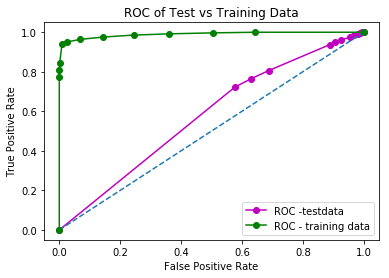

In [18]:
plt.plot(fpr_test, tpr_test, color='m', marker='o',label='ROC -testdata')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr, tpr_tr, linestyle='-', color='g', marker='o', label='ROC - training data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Test vs Training Data')
plt.legend()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.63 µs


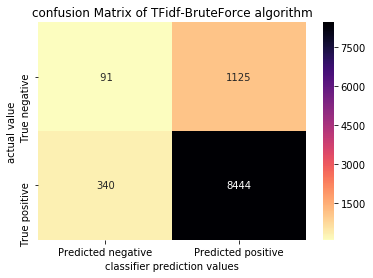

In [19]:
%time
#creating confusion matrix:

cf = confusion_matrix(ytest, y_pred)
labels = ['True negative', 'True positive']

df_cf = pd.DataFrame(cf, index=labels, columns=['Predicted negative', 'Predicted positive'])
sns.heatmap(df_cf, annot=True,fmt='3d', cmap='magma_r')

plt.title("confusion Matrix of TFidf-BruteForce algorithm")
plt.xlabel("classifier prediction values")
plt.ylabel("actual value")
plt.show()

***TFidfKD tree - optimal k = 47 , AUC = 0.58***

# 5. Avg-W2V-BruteForce implementation

In [9]:
#sampling precossed 'text' column for w2v:
d = df.head(50000)
x = d['Text']
y = d['numeric_score'].apply(lambda x: 0 if int(x) < 3 else 1)

#train-test split and balancing the dataset:

#train test split:
xt, xtest, yt, ytest = train_test_split(x, y, test_size=0.2, shuffle=False)
xtr, xcv, ytr, ycv = train_test_split(xt, yt, test_size=0.2, shuffle=False)

***Balancing train data***

In [10]:
#balancing the training dataset:
dtrain = pd.concat([xtr, ytr], axis=1)
print(dtrain.head(2))
d0 = dtrain[dtrain['numeric_score'] == 0.0]
d1 = dtrain[dtrain['numeric_score'] == 1.0]

d1_count, d0_count = ytr.value_counts()
print(d1_count)
print(d0_count)

#oversampling of minority class:
d0_over = d0.sample(d1_count, replace=True)
print(len(d0_over))

#concatenation:
dtrain = pd.concat([d1, d0_over], axis=0)
print(len(dtrain))

                                                     Text  numeric_score
117924  this witty little book makes my son laugh at l...              1
117901  i can remember seeing the show when it aired o...              1
28510
3490
28510
57020


***creating train, cv and test list of words***

In [11]:
%%time

#training list of words:
train_list = []
for sentence in dtrain['Text']:
    tmp_list = []
    for word in sentence.split():
        tmp_list.append(word)
    train_list.append(tmp_list)

#cv list of words
cv_list = []
for sentence in xcv:
    tmp_list = []
    for word in sentence.split():
        tmp_list.append(word)
    cv_list.append(tmp_list)
    
#test list of words:    
test_list = []
for sentence in xtest:
    tmp_list = []
    for word in sentence.split():
        tmp_list.append(word)
    test_list.append(tmp_list)

CPU times: user 1.37 s, sys: 784 ms, total: 2.16 s
Wall time: 2.16 s


***instantiating word2vec object for Training data***

In [12]:
%%time

#importing w2v library
from gensim.models import Word2Vec

#instantiating training,cv, test word to vector object:
trainw2v = Word2Vec(train_list, size=1000, workers=8)
cvw2v = Word2Vec(cv_list, size=1000, workers=8)
testw2v = Word2Vec(test_list, size=1000, workers=8)

#training word2vec List:
train_vocab = list(trainw2v.wv.vocab.keys())

#cv word2vec List:
cv_vocab = list(cvw2v.wv.vocab.keys())

#test word2vec List:
test_vocab = list(testw2v.wv.vocab.keys())

CPU times: user 3min 20s, sys: 956 ms, total: 3min 21s
Wall time: 29.6 s


***Avg-W2V representation of train,CV and test data***

In [13]:
%%time

#avg-w2v for training data****************************:
train_vector = []
for sentence in train_list:
    vector = np.zeros(1000)
    for word in sentence:
        cnt = 0
        if word in train_vocab:
            vector = vector + trainw2v.wv[word]
            cnt = cnt + 1
    if cnt != 0:
        vector = vector / cnt
    train_vector.append(vector)
    
train_vector = np.array(train_vector)
print(train_vector.shape)


#avg-w2v for cv data***********************************:
cv_vector = []
for sentence in cv_list:
    vector = np.zeros(1000)
    for word in sentence:
        cnt = 0
        if word in cv_vocab:
            vector = vector + cvw2v.wv[word]
            cnt = cnt + 1
    if cnt != 0:
        vector = vector / cnt
    cv_vector.append(vector)
    
cv_vector = np.array(cv_vector)
print(cv_vector.shape)




#avg-w2v for test data**********************************:    
test_vector = []
for sentence in test_list:
    vector = np.zeros(1000)
    for word in sentence:
        cnt = 0
        if word in test_vocab:
            vector = vector + testw2v.wv[word]
            cnt = cnt + 1
    if cnt != 0:
        vector = vector / cnt
    test_vector.append(vector)
    
test_vector = np.array(test_vector)
print(test_vector.shape) 

(57020, 1000)
(8000, 1000)
(10000, 1000)
CPU times: user 25min 15s, sys: 3.56 s, total: 25min 19s
Wall time: 25min 15s


***standardizing data***

In [14]:
#standardizing the data:
sc = StandardScaler(with_mean=False)
xtr = sc.fit_transform(train_vector)
xcv = sc.transform(cv_vector)
xtest = sc.transform(test_vector)
print(xtr.shape)
print(xcv.shape)
print(xtest.shape)

(57020, 1000)
(8000, 1000)
(10000, 1000)


***KNN-BruteForce-Avg-W2V implementation***

In [17]:
psutil.virtual_memory()

svmem(total=25285955584, available=21630160896, percent=14.5, used=3301593088, free=20907450368, active=3202215936, inactive=944029696, buffers=42205184, cached=1034706944, shared=19697664, slab=59912192)

In [17]:
%%time

auc_cv_dict = {}
auc_tr_dict = {}


for i in range(3, 50, 4):
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='brute', weights='uniform')
    knn.fit(xtr, dtrain['numeric_score'])
    
    #performance metrics for cv data:
    y_pred_cv = knn.predict_proba(xcv)        
    fpr_cv, tpr_cv, thresholds_cv = roc_curve(ycv, y_pred_cv[:,1])
    auc_cv_dict[i] = auc(fpr_cv, tpr_cv)
    
    
    #performance metrics for training data:
    y_pred_tr = knn.predict_proba(xtr)
    fpr_tr, tpr_tr, thresholds_tr = roc_curve(dtrain['numeric_score'], y_pred_tr[:,1])
    auc_tr_dict[i] = auc(fpr_tr, tpr_tr)    

CPU times: user 1h 42min 19s, sys: 11min 44s, total: 1h 54min 4s
Wall time: 23min 20s


***Optimal k***

In [18]:
#sorting dictionary wrt higest AuC Score of both training and cv data:
cv_tup = sorted(auc_cv_dict.items(), key= lambda x: x[1],reverse=True)
tr_tup = sorted(auc_tr_dict.items(), key= lambda x: x[1],reverse=True)
print(cv_tup)
print()
print('optimal k and auc value on cv data is:\n {}'.format(cv_tup[0]))

[(47, 0.5907651924655328), (43, 0.586925073335929), (23, 0.5769363294945998), (39, 0.576748418926174), (19, 0.5759431209104817), (11, 0.5744339858087105), (31, 0.5734264587625986), (27, 0.573264644745871), (35, 0.5723076942026087), (15, 0.5699346015795572), (7, 0.5697014261957956), (3, 0.5251706244897123)]

optimal k and auc value on cv data is:
 (47, 0.5907651924655328)


***AUC for training vs cv datapoints***

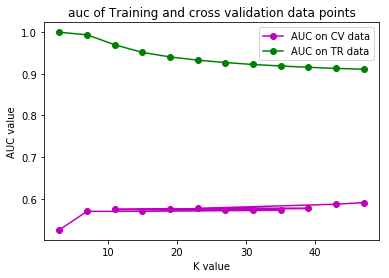

In [19]:
plt.plot([x[0] for x in cv_tup], [x[1] for x in cv_tup], linestyle='-', color='m', marker='o',label='AUC on CV data')
plt.plot([x[0] for x in tr_tup], [x[1] for x in tr_tup], linestyle='-', color='g', marker='o', label='AUC on TR data')
#plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("K value")
plt.ylabel('AUC value')
plt.title('auc of Training and cross validation data points')
plt.legend()

***KNN-BruteForce classifier on optimal k***

In [20]:
knn = KNeighborsClassifier(n_neighbors=11, algorithm='brute', weights='uniform', n_jobs=-1)
knn.fit(xtr, dtrain['numeric_score'])

#performance metrics for cv data:
y_pred_test = knn.predict_proba(xtest)
y_pred = knn.predict(xtest)
fpr_test, tpr_test, thresholds_test= roc_curve(ytest, y_pred_test[:,1])
auc_test = auc(fpr_test, tpr_test)
print(np.round(auc_test,2))

y_pred_tr = knn.predict_proba(xtr)
fpr_tr, tpr_tr, thresholds_tr = roc_curve(dtrain['numeric_score'], y_pred_tr[:,1])

0.6


***ROC curve of training vs test datapoints***

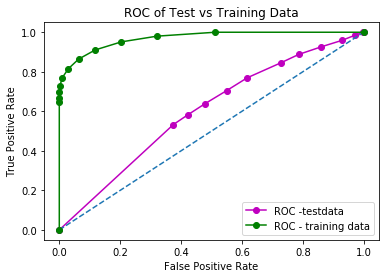

In [21]:
plt.plot(fpr_test, tpr_test, color='m', marker='o',label='ROC -testdata')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr, tpr_tr, linestyle='-', color='g', marker='o', label='ROC - training data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Test vs Training Data')
plt.legend()

***Plotting confusion matrix***

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.68 µs


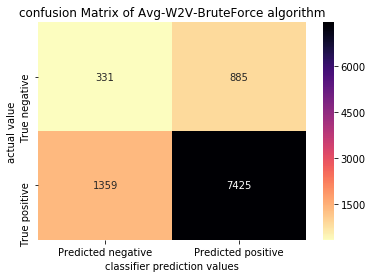

In [22]:
%time
#creating confusion matrix:

cf = confusion_matrix(ytest, y_pred)
labels = ['True negative', 'True positive']

df_cf = pd.DataFrame(cf, index=labels, columns=['Predicted negative', 'Predicted positive'])
sns.heatmap(df_cf, annot=True,fmt='3d', cmap='magma_r')

plt.title("confusion Matrix of Avg-W2V-BruteForce algorithm")
plt.xlabel("classifier prediction values")
plt.ylabel("actual value")
plt.show()

***AvgW2V-BruteForce - optimal k = 47 , AUC = 0.60***

# 6. AvgWV- Kdtree implementation

In [14]:
psutil.virtual_memory()

svmem(total=25285955584, available=21927403520, percent=13.3, used=3012493312, free=21198508032, active=3601829888, inactive=260513792, buffers=45678592, cached=1029275648, shared=11325440, slab=61198336)

In [15]:
%%time

#avg-w2v for training data****************************:
train_vector = []
for sentence in train_list:
    vector = np.zeros(1000)
    for word in sentence:
        cnt = 0
        if word in train_vocab:
            vector = vector + trainw2v.wv[word]
            cnt = cnt + 1
    if cnt != 0:
        vector = vector / cnt
    train_vector.append(vector)
    
train_vector = np.array(train_vector)
print(train_vector.shape)


#avg-w2v for cv data***********************************:
cv_vector = []
for sentence in cv_list:
    vector = np.zeros(1000)
    for word in sentence:
        cnt = 0
        if word in cv_vocab:
            vector = vector + cvw2v.wv[word]
            cnt = cnt + 1
    if cnt != 0:
        vector = vector / cnt
    cv_vector.append(vector)
    
cv_vector = np.array(cv_vector)
print(cv_vector.shape)




#avg-w2v for test data**********************************:    
test_vector = []
for sentence in test_list:
    vector = np.zeros(1000)
    for word in sentence:
        cnt = 0
        if word in test_vocab:
            vector = vector + testw2v.wv[word]
            cnt = cnt + 1
    if cnt != 0:
        vector = vector / cnt
    test_vector.append(vector)
    
test_vector = np.array(test_vector)
print(test_vector.shape) 

(57020, 1000)
(8000, 1000)
(10000, 1000)
CPU times: user 26min 33s, sys: 3.94 s, total: 26min 37s
Wall time: 26min 32s


In [16]:
#standardizing the data:
sc = StandardScaler(with_mean=False)
xtr = sc.fit_transform(train_vector)
xcv = sc.transform(cv_vector)
xtest = sc.transform(test_vector)
print(xtr.shape)
print(xcv.shape)
print(xtest.shape)

(57020, 1000)
(8000, 1000)
(10000, 1000)


In [17]:
%%time

auc_cv_dict = {}
auc_tr_dict = {}


for i in range(3, 50, 4):
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='kd_tree', weights='uniform', n_jobs=4)
    knn.fit(xtr, dtrain['numeric_score'])
    
    #performance metrics for cv data:
    y_pred_cv = knn.predict_proba(xcv)        
    fpr_cv, tpr_cv, thresholds_cv = roc_curve(ycv, y_pred_cv[:,1])
    auc_cv_dict[i] = auc(fpr_cv, tpr_cv)
    
    
    #performance metrics for training data:
    y_pred_tr = knn.predict_proba(xtr)
    fpr_tr, tpr_tr, thresholds_tr = roc_curve(dtrain['numeric_score'], y_pred_tr[:,1])
    auc_tr_dict[i] = auc(fpr_tr, tpr_tr)    

CPU times: user 1d 2h 58min 50s, sys: 4.98 s, total: 1d 2h 58min 55s
Wall time: 7h 42min 9s


***optimal K***

In [18]:
#sorting dictionary wrt higest AuC Score of both training and cv data:
cv_tup = sorted(auc_cv_dict.items(), key= lambda x: x[1],reverse=True)
tr_tup = sorted(auc_tr_dict.items(), key= lambda x: x[1],reverse=True)
print(cv_tup)
print()
print('optimal k and auc value on cv data is:\n {}'.format(cv_tup[0]))

[(47, 0.5319765127955474), (43, 0.5290349926275317), (39, 0.5265455817460241), (35, 0.5251305173999337), (31, 0.5176950016712571), (27, 0.5072208157797458), (7, 0.504448191878476), (3, 0.5032813911879258), (23, 0.5032499059677349), (19, 0.5015346158056421), (11, 0.5002669700333066), (15, 0.4999117797986824)]

optimal k and auc value on cv data is:
 (47, 0.5319765127955474)


***AUC of train vs CV datapoints***

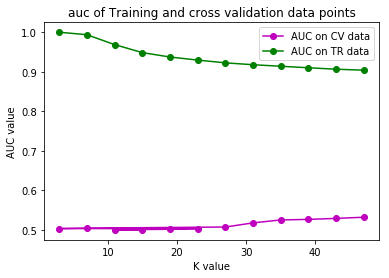

In [19]:
plt.plot([x[0] for x in cv_tup], [x[1] for x in cv_tup], linestyle='-', color='m', marker='o',label='AUC on CV data')
plt.plot([x[0] for x in tr_tup], [x[1] for x in tr_tup], linestyle='-', color='g', marker='o', label='AUC on TR data')
#plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("K value")
plt.ylabel('AUC value')
plt.title('auc of Training and cross validation data points')
plt.legend()

***KD-Tree implementation on optimal K***

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11, algorithm='kd_tree', weights='uniform')
knn.fit(xtr, dtrain['numeric_score'])

#performance metrics for cv data:
y_pred_test = knn.predict_proba(xtest)
y_pred = knn.predict(xtest)
fpr_test, tpr_test, thresholds_test= roc_curve(ytest, y_pred_test[:,1])
auc_test = auc(fpr_test, tpr_test)
print(np.round(auc_test,2))

y_pred_tr = knn.predict_proba(xtr)
fpr_tr, tpr_tr, thresholds_tr = roc_curve(dtrain['numeric_score'], y_pred_tr[:,1])

0.62


***ROC of train vs CV datapoints***

In [ ]:
plt.plot(fpr_test, tpr_test, color='m', marker='o',label='ROC -testdata')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr, tpr_tr, linestyle='-', color='g', marker='o', label='ROC - training data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Test vs Training Data')
plt.legend()

***Plotting confusion matrix***

In [ ]:
%time
#creating confusion matrix:

cf = confusion_matrix(ytest, y_pred)
labels = ['True negative', 'True positive']

df_cf = pd.DataFrame(cf, index=labels, columns=['Predicted negative', 'Predicted positive'])
sns.heatmap(df_cf, annot=True,fmt='3d', cmap='magma_r')

plt.title("confusion Matrix of Avg-W2V-BruteForce algorithm")
plt.xlabel("classifier prediction values")
plt.ylabel("actual value")
plt.show()

# TF-idf-weighted-w2v-BruteForce

In [63]:
#sampling precossed 'text' column for w2v:
d = df.head(10000)
x = d['Text']
y = d['numeric_score'].apply(lambda x: 0 if int(x) < 3 else 1)

#train-test split and balancing the dataset:

#train test split:
xt, xtest, yt, ytest = train_test_split(x, y, test_size=0.2, shuffle=False)
xtr, xcv, ytr, ycv = train_test_split(xt, yt, test_size=0.2, shuffle=False)

***balancing the dataset***

In [64]:
#balancing the training dataset:
dtrain = pd.concat([xtr, ytr], axis=1)
print(dtrain.head(2))
d0 = dtrain[dtrain['numeric_score'] == 0.0]
d1 = dtrain[dtrain['numeric_score'] == 1.0]

d1_count, d0_count = ytr.value_counts()
print(d1_count)
print(d0_count)

#oversampling of minority class:
d0_over = d0.sample(d1_count, replace=True)
print(len(d0_over))

#concatenation:
dtrain = pd.concat([d1, d0_over], axis=0)
print(len(dtrain))

                                                     Text  numeric_score
117924  this witty little book makes my son laugh at l...              1
117901  i can remember seeing the show when it aired o...              1
5651
749
5651
11302


***Creating list of list of training, test, cv data***

In [65]:
%%time

#training list of words:
train_list = []
for sentence in dtrain['Text']:
    tmp_list = []
    for word in sentence.split():
        tmp_list.append(word)
    train_list.append(tmp_list)

#cv list of words
cv_list = []
for sentence in xcv:
    tmp_list = []
    for word in sentence.split():
        tmp_list.append(word)
    cv_list.append(tmp_list)
    
#test list of words:    
test_list = []
for sentence in xtest:
    tmp_list = []
    for word in sentence.split():
        tmp_list.append(word)
    test_list.append(tmp_list)

CPU times: user 436 ms, sys: 28 ms, total: 464 ms
Wall time: 465 ms


***instantiating w2v for training test, cv data***

In [66]:
%%time

#importing w2v library
from gensim.models import Word2Vec

#instantiating training,cv, test word to vector object:
trainw2v = Word2Vec(train_list, size=1000, workers=8)
cvw2v = Word2Vec(cv_list, size=1000, workers=8)
testw2v = Word2Vec(test_list, size=1000, workers=8)

#training word2vec List:
train_vocab = list(trainw2v.wv.vocab.keys())

#cv word2vec List:
cv_vocab = list(cvw2v.wv.vocab.keys())

#test word2vec List:
test_vocab = list(testw2v.wv.vocab.keys())

CPU times: user 39.9 s, sys: 292 ms, total: 40.2 s
Wall time: 6.64 s


***for future***

In [67]:
xtr = dtrain['Text']
xc = xcv
x_test = xtest
ytr = dtrain['numeric_score']
yc = ycv
y_test = ytest

***tf-idf of train data and creation of dictionary of training data***

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(dtrain['Text'])
xcv = model.transform(xcv)
xtest = model.transform(xtest)

# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

***tfidf-w2v for training data***

In [69]:
import tqdm

***TFIDF-W2V for training data***

In [70]:
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_train_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in train_list: # for each review/sentence 
    sent_vec = np.zeros(1000) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in train_vocab and word in tfidf_feat:
            vec = trainw2v.wv[word]            
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_train_vectors.append(sent_vec)
    row += 1

***TFIDF-W2V for CV data***

In [71]:
%%time

tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_cv_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in cv_list: # for each review/sentence 
    sent_vec = np.zeros(1000) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in cv_vocab and word in tfidf_feat:
            vec = cvw2v.wv[word]            
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_cv_vectors.append(sent_vec)
    row += 1

CPU times: user 43.9 s, sys: 72 ms, total: 44 s
Wall time: 43.9 s


***TFIDF-W2V for test data***

In [72]:
%%time

tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_test_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in test_list: # for each review/sentence 
    sent_vec = np.zeros(1000) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in test_vocab and word in tfidf_feat:
            vec = testw2v.wv[word]            
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_test_vectors.append(sent_vec)
    row += 1

CPU times: user 1min 2s, sys: 112 ms, total: 1min 2s
Wall time: 1min 2s


***conversion of list into array***

In [73]:
xtr = np.array(tfidf_train_vectors)
xcv = np.array(tfidf_cv_vectors)
xtest = np.array(tfidf_test_vectors)

***standardizing data***

In [74]:
#standardizing the data:
sc = StandardScaler(with_mean=False)
xtr = sc.fit_transform(xtr)
xcv = sc.transform(xcv)
xtest = sc.transform(xtest)
print(xtr.shape)
print(xcv.shape)
print(xtest.shape)

(11302, 1000)
(1600, 1000)
(2000, 1000)


***BruteForce KNN on tfidf-w2v***

In [75]:
%%time
auc_cv_dict = {}
auc_tr_dict = {}


for i in range(3, 50, 4):
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='brute', weights='uniform', n_jobs=-1)
    knn.fit(xtr, dtrain['numeric_score'])
    #performance metrics for cv data:
    y_pred_cv = knn.predict_proba(xcv)        
    fpr_cv, tpr_cv, thresholds_cv = roc_curve(ycv, y_pred_cv[:,1])
    auc_cv_dict[i] = auc(fpr_cv, tpr_cv)
    
    #performance metrics for training data:
    y_pred_tr = knn.predict_proba(xtr)
    fpr_tr, tpr_tr, thresholds_tr = roc_curve(dtrain['numeric_score'], y_pred_tr[:,1])
    auc_tr_dict[i] = auc(fpr_tr, tpr_tr)
    

CPU times: user 29.7 s, sys: 46.4 s, total: 1min 16s
Wall time: 1min 58s


***optimal K***

In [76]:
#sorting dictionary wrt higest AuC Score of both training and cv data:
cv_tup = sorted(auc_cv_dict.items(), key= lambda x: x[1],reverse=True)
tr_tup = sorted(auc_tr_dict.items(), key= lambda x: x[1],reverse=True)
print(cv_tup)
print('*' * 70)
print(tr_tup)

[(23, 0.525170196332022), (43, 0.5233986276517397), (35, 0.5219099710800955), (39, 0.5211083867722871), (31, 0.5), (47, 0.49659382802536334), (15, 0.49547565159598356), (3, 0.4896849347056816), (7, 0.4858858292468251), (11, 0.485852149233892), (27, 0.4840042391909612), (19, 0.47695613515115587)]
**********************************************************************
[(3, 0.9998257332410884), (7, 0.9841385151739375), (11, 0.940887822905892), (15, 0.9094238891261333), (19, 0.8936542662115293), (23, 0.8797253574668421), (27, 0.8691822811822496), (31, 0.8643623726470895), (35, 0.8575178069156252), (39, 0.8508994904803221), (43, 0.8452976831664981), (47, 0.8404385685249307)]


***AUC of train vs cv data***

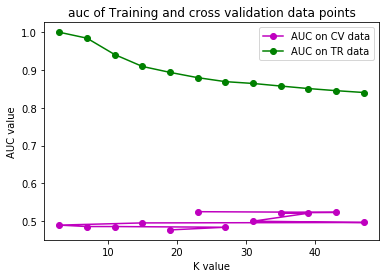

In [77]:
plt.plot([x[0] for x in cv_tup], [x[1] for x in cv_tup], linestyle='-', color='m', marker='o',label='AUC on CV data')
plt.plot([x[0] for x in tr_tup], [x[1] for x in tr_tup], linestyle='-', color='g', marker='o', label='AUC on TR data')
#plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("K value")
plt.ylabel('AUC value')
plt.title('auc of Training and cross validation data points')
plt.legend()

***KNN brute force on optimal K***

In [78]:
knn = KNeighborsClassifier(n_neighbors=11, algorithm='brute', weights='uniform', n_jobs=12)
knn.fit(xtr, dtrain['numeric_score'])
#performance metrics for cv data:
y_pred_test = knn.predict_proba(xtest)
y_pred = knn.predict(xtest)
fpr_test, tpr_test, thresholds_test= roc_curve(ytest, y_pred_test[:,1])
auc_test = auc(fpr_test, tpr_test)
print(auc_test)

y_pred_tr = knn.predict_proba(xtr)
fpr_tr, tpr_tr, thresholds_tr = roc_curve(dtrain['numeric_score'], y_pred_tr[:,1])

0.48215795975431447


***confusion matrix***

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.68 µs


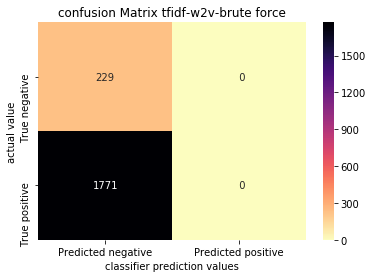

In [79]:
%time
#creating confusion matrix:

cf = confusion_matrix(ytest, y_pred)
labels = ['True negative', 'True positive']

df_cf = pd.DataFrame(cf, index=labels, columns=['Predicted negative', 'Predicted positive'])
sns.heatmap(df_cf, annot=True,fmt='3d', cmap='magma_r')

plt.title("confusion Matrix tfidf-w2v-brute force")
plt.xlabel("classifier prediction values")
plt.ylabel("actual value")
plt.show()

***ROC curve***

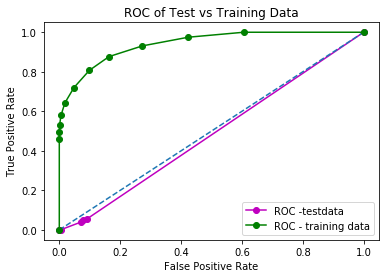

In [80]:
plt.plot(fpr_test, tpr_test, color='m', marker='o',label='ROC -testdata')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr, tpr_tr, linestyle='-', color='g', marker='o', label='ROC - training data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Test vs Training Data')
plt.legend()

***TFIDF-W2V Bruteforce: optimal k =15, AUC=0.54***

# KDtree implementation

In [81]:
%%time
auc_cv_dict = {}
auc_tr_dict = {}


for i in range(3, 50, 4):
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='kd_tree', weights='uniform', n_jobs=-1)
    knn.fit(xtr, dtrain['numeric_score'])
    #performance metrics for cv data:
    y_pred_cv = knn.predict_proba(xcv)        
    fpr_cv, tpr_cv, thresholds_cv = roc_curve(ycv, y_pred_cv[:,1])
    auc_cv_dict[i] = auc(fpr_cv, tpr_cv)
    
    #performance metrics for training data:
    y_pred_tr = knn.predict_proba(xtr)
    fpr_tr, tpr_tr, thresholds_tr = roc_curve(dtrain['numeric_score'], y_pred_tr[:,1])
    auc_tr_dict[i] = auc(fpr_tr, tpr_tr)
    

CPU times: user 1h 19min 30s, sys: 212 ms, total: 1h 19min 30s
Wall time: 7min 25s


***optimal K***

In [82]:
#sorting dictionary wrt higest AuC Score of both training and cv data:
cv_tup = sorted(auc_cv_dict.items(), key= lambda x: x[1],reverse=True)
tr_tup = sorted(auc_tr_dict.items(), key= lambda x: x[1],reverse=True)
print(cv_tup)
print('*' * 70)
print(tr_tup)

[(23, 0.525170196332022), (43, 0.5233986276517397), (35, 0.5219099710800955), (39, 0.5211083867722871), (31, 0.5), (47, 0.49659382802536334), (15, 0.49547565159598356), (3, 0.4896849347056816), (7, 0.4858858292468251), (11, 0.485852149233892), (27, 0.4840042391909612), (19, 0.47695613515115587)]
**********************************************************************
[(3, 0.9998257332410884), (7, 0.9841385151739375), (11, 0.940887822905892), (15, 0.9094238891261333), (19, 0.8936542662115293), (23, 0.8797253574668421), (27, 0.8691822811822496), (31, 0.8643623726470895), (35, 0.8575178069156252), (39, 0.8508994904803221), (43, 0.8452976831664981), (47, 0.8404385685249307)]


***AUC on train vs cv data***

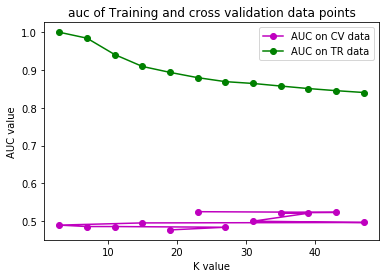

In [83]:
plt.plot([x[0] for x in cv_tup], [x[1] for x in cv_tup], linestyle='-', color='m', marker='o',label='AUC on CV data')
plt.plot([x[0] for x in tr_tup], [x[1] for x in tr_tup], linestyle='-', color='g', marker='o', label='AUC on TR data')
#plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("K value")
plt.ylabel('AUC value')
plt.title('auc of Training and cross validation data points')
plt.legend()

***KD tree algo on optimal K***

In [84]:
knn = KNeighborsClassifier(n_neighbors=15, algorithm='kd_tree', weights='uniform', n_jobs=12)
knn.fit(xtr, dtrain['numeric_score'])
#performance metrics for cv data:
y_pred_test = knn.predict_proba(xtest)
y_pred = knn.predict(xtest)
fpr_test, tpr_test, thresholds_test= roc_curve(ytest, y_pred_test[:,1])
auc_test = auc(fpr_test, tpr_test)
print(auc_test)

y_pred_tr = knn.predict_proba(xtr)
fpr_tr, tpr_tr, thresholds_tr = roc_curve(dtrain['numeric_score'], y_pred_tr[:,1])

0.47885757682605984


***confusion matrix***

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.2 µs


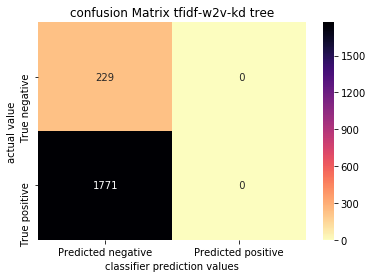

In [85]:
%time
#creating confusion matrix:

cf = confusion_matrix(ytest, y_pred)
labels = ['True negative', 'True positive']

df_cf = pd.DataFrame(cf, index=labels, columns=['Predicted negative', 'Predicted positive'])
sns.heatmap(df_cf, annot=True,fmt='3d', cmap='magma_r')

plt.title("confusion Matrix tfidf-w2v-kd tree")
plt.xlabel("classifier prediction values")
plt.ylabel("actual value")
plt.show()

***ROC curve***

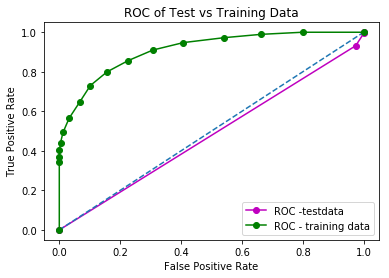

In [86]:
plt.plot(fpr_test, tpr_test, color='m', marker='o',label='ROC -testdata')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr, tpr_tr, linestyle='-', color='g', marker='o', label='ROC - training data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Test vs Training Data')
plt.legend()

# tfidf-w2v kdtree - optimal k =15, AUC = 0.51

***consolidating performance of all four vectorizers and diplaying***

In [5]:
perf_dict = dict(algorithm = ['Brute-Bow', 'Brute-Tfidf', 'Brute-W2V', 'Brute-Tfidf-W2V',
                             'KD-Bow', 'KD-Tfidf', 'KD-W2V', 'KD-Tfidf-W2V'],
                Koptimal = [47, 11,47, 15, 39, 47, 47, 15 ],
                AUC = [0.71, 0.67, 0.60, 0.54, 0.70, 0.58, 0.62, 0.51])

perf_df = pd.DataFrame(perf_dict)
perf_df

,AUC,Koptimal,algorithm
0,0.71,47,Brute-Bow
1,0.67,11,Brute-Tfidf
2,0.60,47,Brute-W2V
3,0.54,15,Brute-Tfidf-W2V
4,0.70,39,KD-Bow
5,0.58,47,KD-Tfidf
6,0.62,47,KD-W2V
7,0.51,15,KD-Tfidf-W2V


***SUMMARY :***
- taken 50K datapoints for each vectorizers and observed:

1. out of eight vectorizerizers, we could see best AUC was observed in case of BOW-brute force implementation observed.
2. least AUC was observed in case of tfidf-w2v-KNN implementation for both of its version(brute and KDtree).
3. least time taken to train the model and finding optimal k was bow-bruteForce-KNN ~ 43min 14s.
4. Maximum time taken to train the model and finding optimal k was w2v-KDtree-KNN ~ 7h 42min 9s.